# Default of credit card clients

### Problem Statement: -
    By using this model we will able to understand the pattern and important features which leads to a default of credit
    card.
    We will get to know How does the probability of default payment vary by categories of different demographic variables.
    by using this model we will able to predict which customer will default next month or not

#### Data Source Link - https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

### Dateset information: -
    This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Attribute Information: -
    1. ID: ID of each client
    2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    3. SEX: Gender (1=male, 2=female)
    4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=others, 6=others, 0=others)
    5. MARRIAGE: Marital status (1=married, 2=single, 3=others, 0=others)
    6. AGE: Age in years
    7. PAY_0: Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    8. PAY_2: Repayment status in August 2005 (scale same as above)
    9. PAY_3: Repayment status in July 2005 (scale same as above)
    10. PAY_4: Repayment status in June 2005 (scale same as above)
    11. PAY_5: Repayment status in May 2005 (scale same as above)
    12. PAY_6: Repayment status in April 2005 (scale same as above)
    13. BILL_AMT1: Amount of bill statement in September 2005 (NT dollar)
    14. BILL_AMT2: Amount of bill statement in August 2005 (NT dollar)
    15. BILL_AMT3: Amount of bill statement in July 2005 (NT dollar)
    16. BILL_AMT4: Amount of bill statement in June 2005 (NT dollar)
    17. BILL_AMT5: Amount of bill statement in May 2005 (NT dollar)
    18. BILL_AMT6: Amount of bill statement in April 2005 (NT dollar)
    19. PAY_AMT1: Amount of previous payment in September 2005 (NT dollar)
    20. PAY_AMT2: Amount of previous payment in August 2005 (NT dollar)
    21. PAY_AMT3: Amount of previous payment in July 2005 (NT dollar)
    22. PAY_AMT4: Amount of previous payment in June 2005 (NT dollar)
    23. PAY_AMT5: Amount of previous payment in May 2005 (NT dollar)
    24. PAY_AMT6: Amount of previous payment in April 2005 (NT dollar)
    25. default.payment.next.month: Default payment (1=yes, 0=no)

## Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("default of credit card clients (1).xls" , header= 1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- There are 30,000 distinct credit card clients.
- The average value for the amount of credit card limit is 1,67,484.32. Max value is 10,00,000.
- Average age is 35.5 years, with a minimum age of 21 years. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Checking for missing Values

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Here, there are no missing values.

#### Checking for the distribustion

In [8]:
df = df.drop(['ID'], axis=1)

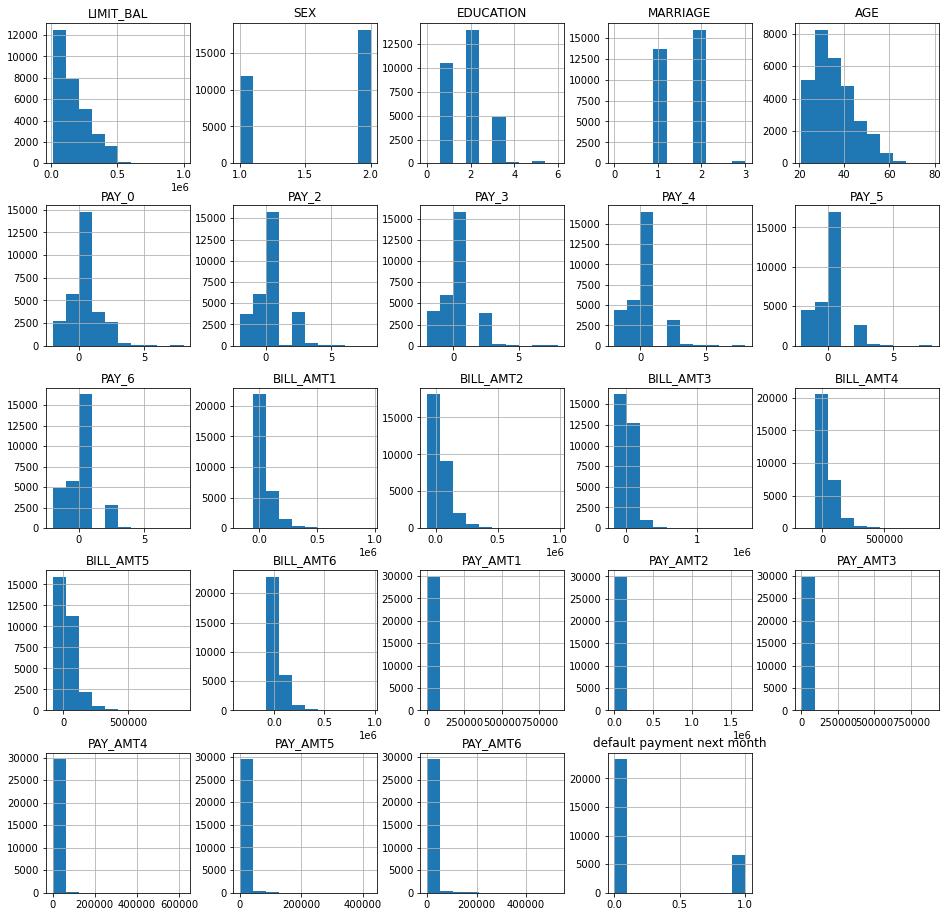

In [9]:
plt.rcParams['figure.figsize'] = (16,16)
df.hist()
plt.show()

### Exploratory Data Analysis (EDA)

#### Handling categorical feature

In [10]:
df1 = df.copy()

In [11]:
df1['SEX'] = df1['SEX'].replace({1:'Male',2:'Female'})
df1['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

<AxesSubplot:>

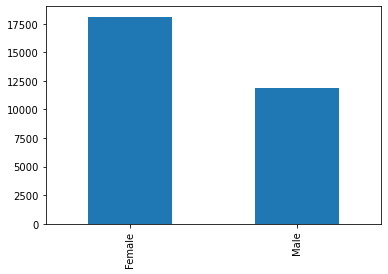

In [12]:
plt.figure(figsize =(6, 4))
df1['SEX'].value_counts().plot.bar()

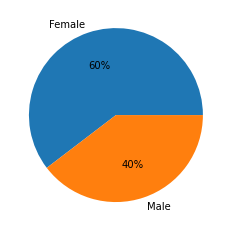

In [13]:
plt.figure(figsize =(6, 4))
plt.pie(df1["SEX"].value_counts(), labels=["Female", "Male"], autopct='%.0f%%')
None

It finds that The number of Male credit holder is less than Female.

In [14]:
df1['EDUCATION'] = df1['EDUCATION'].replace({1:'Graduate School',2:'University' , 3:'High School' , 4:'Others', 5:'Others', 6:'Others', 0:'Others'})
df1['MARRIAGE'] = df1['MARRIAGE'].replace({1:'Married',2:'Single', 3:'Others',0:'Others'})
df1['default payment next month'] = df1['default payment next month'].replace({1:'Yes',0:'No'})

<AxesSubplot:xlabel='SEX', ylabel='count'>

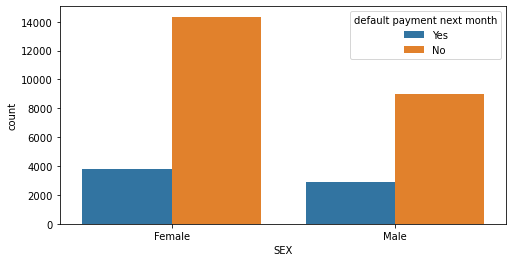

In [15]:
plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(x=df1['SEX'], data = df1, hue ="default payment next month")

For females, the count of default payment next month = No is highter than males.

In [16]:
df1.groupby(['SEX'])['default payment next month'].value_counts().to_frame("No of User")

No of User
SEX    default payment next month            
Female No                               14349
       Yes                               3763
Male   No                                9015
       Yes                               2873

In [17]:
s = df1.groupby(['SEX'])['default payment next month'].value_counts().to_frame("Percentage of user")
s.groupby(level=0).apply(lambda x: 100*x/x.sum())

Percentage of user
SEX    default payment next month                    
Female No                                   79.223719
       Yes                                  20.776281
Male   No                                   75.832773
       Yes                                  24.167227

It is evident from the above output that females have overall less default payments wrt males

#### For Education

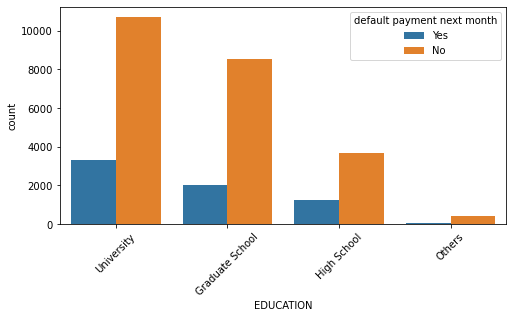

In [18]:
Education_plot = sns.countplot(x=df1['EDUCATION'], data = df1, hue ="default payment next month")
Education_plot.set_xticklabels(Education_plot.get_xticklabels(), rotation=45)
None

In [19]:
df1.groupby(['EDUCATION'])['default payment next month'].value_counts().to_frame("No of User")

No of User
EDUCATION       default payment next month            
Graduate School No                                8549
                Yes                               2036
High School     No                                3680
                Yes                               1237
Others          No                                 435
                Yes                                 33
University      No                               10700
                Yes                               3330

In [20]:
s = df1.groupby(['EDUCATION'])['default payment next month'].value_counts().to_frame("Percentage of user")
s.groupby(level=0).apply(lambda x: 100*x/x.sum())

Percentage of user
EDUCATION       default payment next month                    
Graduate School No                                   80.765234
                Yes                                  19.234766
High School     No                                   74.842384
                Yes                                  25.157616
Others          No                                   92.948718
                Yes                                   7.051282
University      No                                   76.265146
                Yes                                  23.734854

High school and university student have most deafult rate.

In [21]:
u = len(df1[df1["EDUCATION"] == "University"])/df1.shape[0]*100
print("{} % of clients were from University".format(u))

46.766666666666666 % of clients were from University


It looks like, most clients belongs to University followed by Graduate School and High School.

In [22]:
df1['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
Others               468
Name: EDUCATION, dtype: int64

Given above is the total no. of clients splited by education.

In [23]:
df1['EDUCATION'].value_counts()/len(df1)*100

University         46.766667
Graduate School    35.283333
High School        16.390000
Others              1.560000
Name: EDUCATION, dtype: float64

#### For Marriage

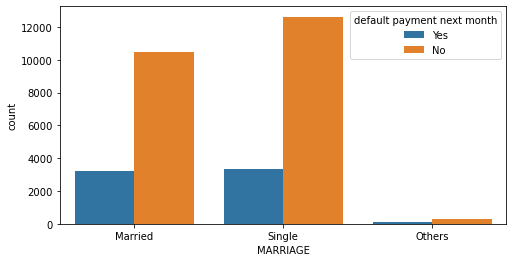

In [24]:
Marriage_plot = sns.countplot(x=df1['MARRIAGE'], data = df1, hue ="default payment next month")

We noticed that there is very less number of values for category Others. Also, there are alomost equal number of clients who defaults the payment next month for both the Married and Single category.



In [25]:
df1['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

In [26]:
df1['MARRIAGE'].value_counts()/len(df1)*100

Single     53.213333
Married    45.530000
Others      1.256667
Name: MARRIAGE, dtype: float64

In [27]:
df1.groupby(['MARRIAGE'])['default payment next month'].value_counts().to_frame("No of User")

No of User
MARRIAGE default payment next month            
Married  No                               10453
         Yes                               3206
Others   No                                 288
         Yes                                 89
Single   No                               12623
         Yes                               3341

In [28]:
s = df1.groupby(['MARRIAGE'])['default payment next month'].value_counts().to_frame("Percentage of user")
s.groupby(level=0).apply(lambda x: 100*x/x.sum())

Percentage of user
MARRIAGE default payment next month                    
Married  No                                   76.528296
         Yes                                  23.471704
Others   No                                   76.392573
         Yes                                  23.607427
Single   No                                   79.071661
         Yes                                  20.928339

From the above plot it is clear that those people who have marital status, single have less default payment wrt married status people

#### For Age

##### Categorising the age in interval

In [29]:
bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df1['AGE_NEW'] = pd.cut(df1['AGE'],bins=bins, labels=labels,right=False)

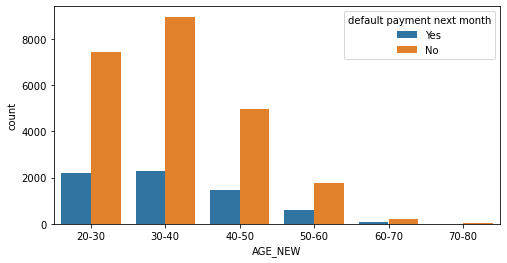

In [30]:
sns.countplot(x=df1['AGE_NEW'], data = df1, hue ="default payment next month")
None

Most no of credit card clients are from 20-40 years of age group.

In [31]:
df1.groupby(['AGE_NEW'])['default payment next month'].value_counts().to_frame("No of User")

No of User
AGE_NEW default payment next month            
20-30   No                                7421
        Yes                               2197
30-40   No                                8962
        Yes                               2276
40-50   No                                4979
        Yes                               1485
50-60   No                                1759
        Yes                                582
60-70   No                                 225
        Yes                                 89
70-80   No                                  18
        Yes                                  7

In [32]:
s = df1.groupby(['AGE_NEW'])['default payment next month'].value_counts().to_frame("Percentage of user")
s.groupby(level=0).apply(lambda x: 100*x/x.sum())

Percentage of user
AGE_NEW default payment next month                    
20-30   No                                   77.157413
        Yes                                  22.842587
30-40   No                                   79.747286
        Yes                                  20.252714
40-50   No                                   77.026609
        Yes                                  22.973391
50-60   No                                   75.138830
        Yes                                  24.861170
60-70   No                                   71.656051
        Yes                                  28.343949
70-80   No                                   72.000000
        Yes                                  28.000000

<AxesSubplot:xlabel='AGE', ylabel='Density'>

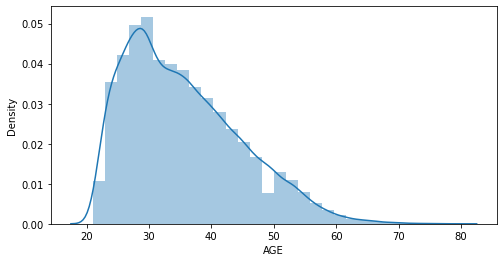

In [33]:
sns.distplot(df['AGE'],kde=True,bins=30)

There is a large number of clients whose age is between 25 to 40.

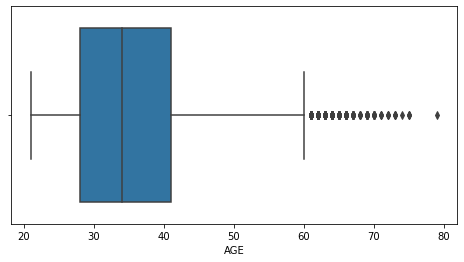

In [34]:
sns.boxplot(x='AGE',data=df1)
None

In [35]:
df1.groupby(['SEX','MARRIAGE'])['default payment next month'].value_counts().to_frame("No of User")

No of User
SEX    MARRIAGE default payment next month            
Female Married  No                                6609
                Yes                               1860
       Others   No                                 185
                Yes                                 47
       Single   No                                7555
                Yes                               1856
Male   Married  No                                3844
                Yes                               1346
       Others   No                                 103
                Yes                                 42
       Single   No                                5068
                Yes                               1485

In [36]:
df1.groupby(['SEX','EDUCATION'])['default payment next month'].value_counts().to_frame("No of User")

No of User
SEX    EDUCATION       default payment next month            
Female Graduate School No                                5101
                       Yes                               1130
       High School     No                                2235
                       Yes                                692
       Others          No                                 279
                       Yes                                 19
       University      No                                6734
                       Yes                               1922
Male   Graduate School No                                3448
                       Yes                                906
       High School     No                                1445
                       Yes                                545
       Others          No                                 156
                       Yes                                 14
       University      No                                3966
                       Yes                               1408

### Numerical Feature

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

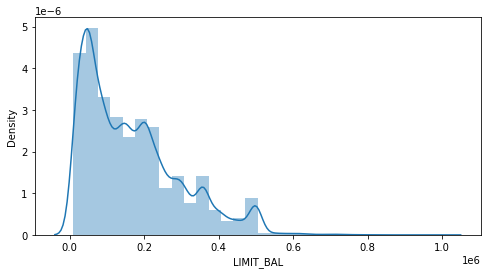

In [37]:
sns.distplot(df1['LIMIT_BAL'],kde=True,bins=30)

Most of the values are between 0.0 to 0.2

<AxesSubplot:xlabel='LIMIT_BAL'>

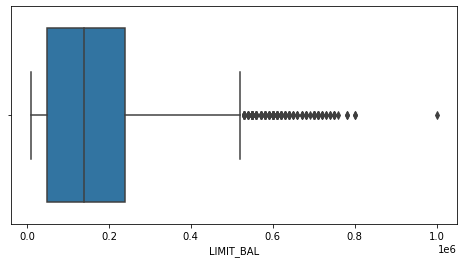

In [38]:
sns.boxplot(x='LIMIT_BAL',data=df1)

As the Limit_bal value increases, the density or the count of the LIMIT_BAL decreases.

<AxesSubplot:>

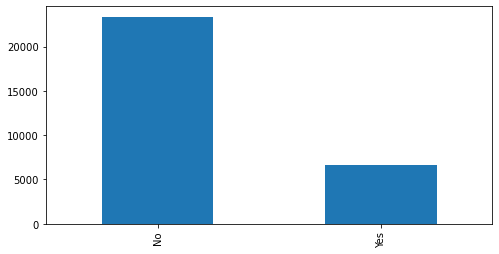

In [39]:
#Check the distribution of data
df1['default payment next month'].value_counts().plot.bar()

From the above result, you can conclude that many of the clients are not defaulting.

In [40]:
df1['default payment next month'].value_counts()/len(df)

No     0.7788
Yes    0.2212
Name: default payment next month, dtype: float64

Arround 78% customer had not default payment next month and about 22% customers had default payment next month which means we have imbalance class of data in target variable which we will take care of before modelling

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

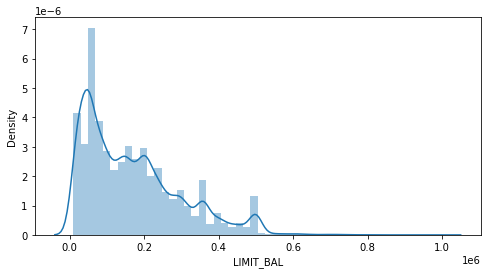

In [41]:
sns.distplot(df1["LIMIT_BAL"], bins = 50)

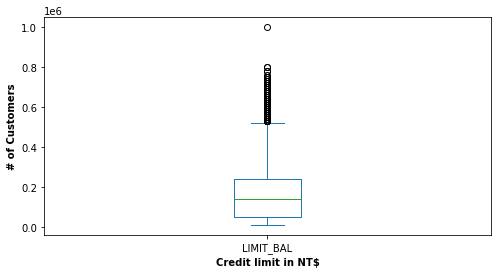

In [42]:
df1["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()
None

In [43]:
# bal_pmt = ['PAY_AMT6','PAY_AMT5','PAY_AMT4',
#               'PAY_AMT3','PAY_AMT2','PAY_AMT1']
# avg_pmt = []

# for month in bal_pmt:
#     avg_pmt.append(df1[month].mean())

# plt.figure(figsize=(10,6))
# plt.plot(bal_pmt, avg_pmt)
# plt.title('Average Payment Over Time ($)')
# plt.show();

In [44]:
# monthly_paymnet = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4',
#                    'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
# avg_bal = []

# for month in monthly_paymnet:
#     avg_bal.append(df1[month].mean())

# plt.figure(figsize=(10,6))
# plt.plot(monthly_paymnet, avg_bal)
# plt.title('Average Balance Over Time ($)')
# plt.show();

<AxesSubplot:>

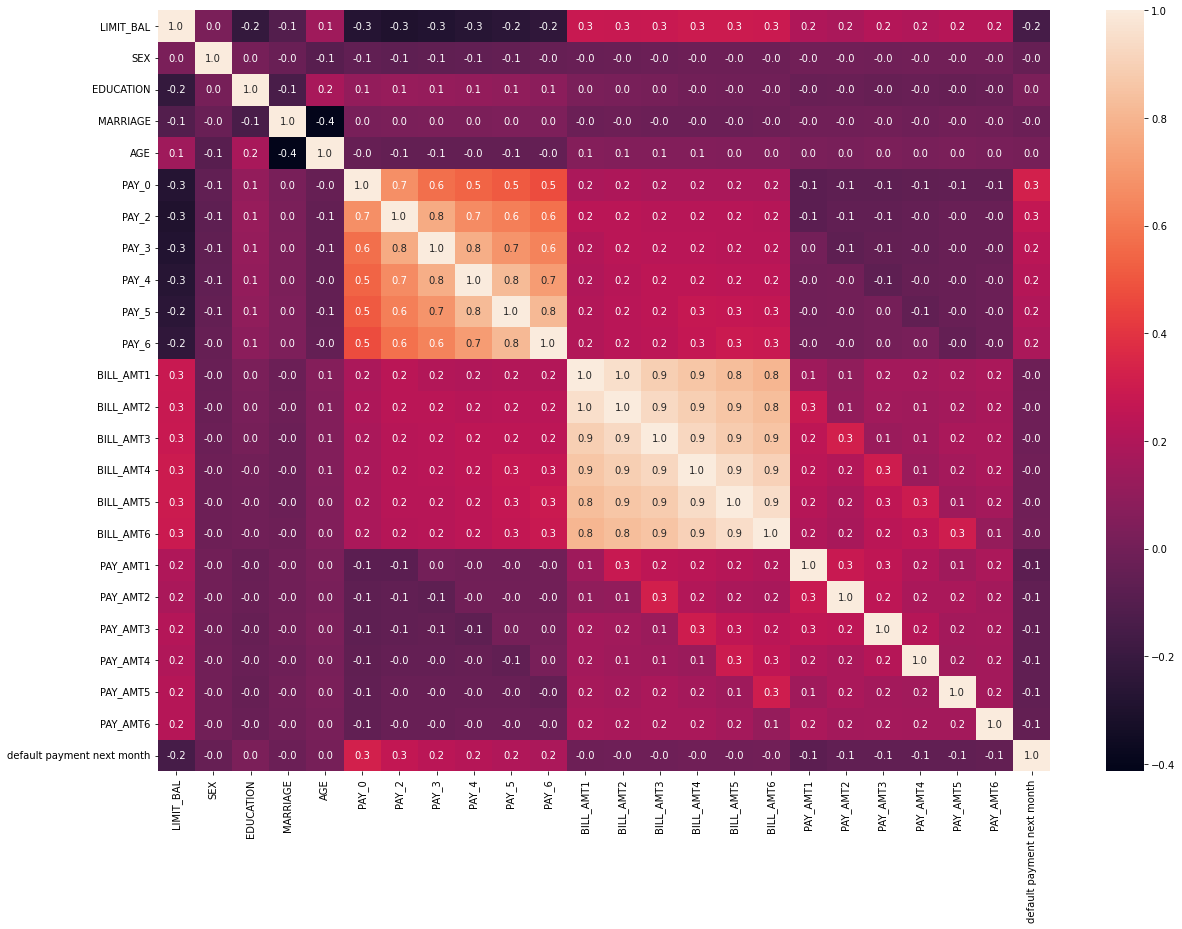

In [45]:
plt.figure(figsize=(20,14))
sns.heatmap (df.corr(),annot=True , fmt=".1f")

So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

<AxesSubplot:title={'center':'Correlation with Default'}>

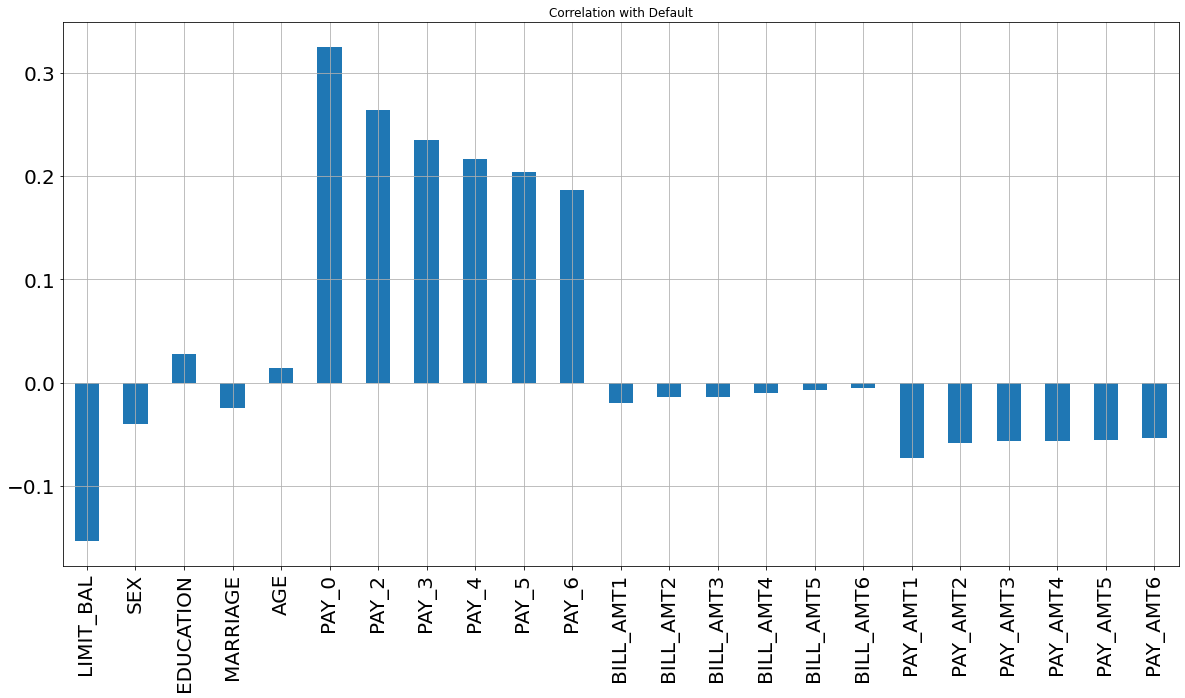

In [46]:
df2=df.copy()
X = df2.drop(['default payment next month'],axis=1)
X.corrwith(df2['default payment next month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction.

In [47]:
df1.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [48]:
condition1 = df['BILL_AMT1'] > df['LIMIT_BAL'] 
condition2 = df['BILL_AMT2'] > df['LIMIT_BAL'] 
condition3 = df['BILL_AMT3'] > df['LIMIT_BAL'] 
condition4 = df['BILL_AMT4'] > df['LIMIT_BAL'] 
condition5 = df['BILL_AMT5'] > df['LIMIT_BAL'] 
condition6 = df['BILL_AMT6'] > df['LIMIT_BAL'] 

In [49]:
large_bill = df[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]

In [50]:
large_bill

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
15,50000,2,3,3,23,1,2,0,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0
40,360000,1,1,2,33,0,0,0,0,0,...,628699,195969,179224,10000,7000,6000,188840,28000,4000,0
49,20000,1,1,2,24,0,0,0,0,0,...,19865,20480,20063,1318,1315,704,928,912,1069,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29980,50000,1,3,2,42,0,0,0,0,0,...,50360,19971,19694,10000,4000,5000,3000,4500,2000,0
29988,250000,1,1,1,34,0,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,0
29992,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,100000,1,1,2,38,0,-1,-1,0,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0


Why are some bill statement amounts greater than credit limit? Could it be late payment interest?
The common sense is that the bill statement amount shouldn't exceed credit limit, however, there are 3931 customers whose bill amounts are greater than credit limit. Could the difference be late payment interest assuming these customers had delayed payment

In [51]:
bill_amt = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
no_transaction = bill_amt[bill_amt.sum(axis=1) ==0]
no_transaction

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
18,0,0,0,0,0,0
19,0,0,0,0,0,0
45,0,0,0,0,0,0
79,0,0,0,0,0,0
121,0,0,0,0,0,0
...,...,...,...,...,...,...
29908,0,0,0,0,0,0
29909,0,0,0,0,0,0
29973,0,0,0,0,0,0
29979,0,0,0,0,0,0


In [52]:
no_transaction_de = df.loc[no_transaction.index,['default payment next month']]
no_transaction_de

,default payment next month
18,0
19,0
45,1
79,1
121,1
...,...
29908,1
29909,0
29973,1
29979,0


In [53]:
# How many inactive customers had default payment next month
# 317 customers had default payment next mont

no_transaction_de['default payment next month'].value_counts()

0    553
1    317
Name: default payment next month, dtype: int64

In [54]:
# sns.boxplot(x='default payment next month',hue='MARRIAGE', y='AGE',data=df1,palette="rainbow")

In [55]:
# sns.boxplot(x='default payment next month',hue='EDUCATION', y='AGE',data=df1,palette="rainbow" )

In [56]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Standardisation

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [60]:
col_to_norm = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
              'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
df[col_to_norm] = scaler.fit_transform(df[col_to_norm])

In [61]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,2.334029,-1,0,-1,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train = df.drop(['default payment next month'],axis = 1)
test = df['default payment next month']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3,shuffle=True,stratify = test, random_state=42)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [66]:
y_train.value_counts()

0    16355
1     4645
Name: default payment next month, dtype: int64

### Making balance data set

In [67]:
!pip install imbalanced-learn

In [68]:
# conda install -c conda-forge imbalanced-learn

In [69]:
#check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [70]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [71]:
# from imblearn.combine import SMOTEENN
# smt = SMOTEENN(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

In [72]:
# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

In [73]:
y_train.value_counts()

0    16355
1    16355
Name: default payment next month, dtype: int64

In [74]:
y_test.value_counts()

0    7009
1    1991
Name: default payment next month, dtype: int64

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [76]:
LR = LogisticRegression()

In [77]:
LR.fit(X_train,y_train)

LogisticRegression()

In [78]:
LR.score(X_test,y_test)

0.6783333333333333

In [79]:
scores = cross_val_score(LR, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_LR = np.mean(scores)

In [80]:
roc_auc_LR

0.7505396309956753

In [81]:
y_pred = LR.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [83]:
roc=roc_auc_LR
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.678333,0.366902,0.625816,0.462595,0.75054


### Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
gnb = GaussianNB()

In [86]:
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
gnb.score(X_test, y_test)

0.4558888888888889

In [88]:
y_pred = gnb.predict(X_test)

In [89]:
scores = cross_val_score(gnb, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_gnb = np.mean(scores)

In [90]:
roc_auc_gnb

0.7401182641223968

In [91]:
roc=roc_auc_gnb
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(res, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.678333,0.366902,0.625816,0.462595,0.750540
1,Naive Bayes,0.455889,0.268704,0.847815,0.408074,0.740118


### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
RF = RandomForestClassifier()

In [94]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
RF.score(X_test,y_test)

0.7885555555555556

In [96]:
scores = cross_val_score(RF, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_RF = np.mean(scores)

In [97]:
roc_auc_RF

0.9279891725184519

In [98]:
y_pred = RF.predict(X_test)

In [99]:
roc=roc_auc_RF
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(res, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.678333,0.366902,0.625816,0.462595,0.750540
1,Naive Bayes,0.455889,0.268704,0.847815,0.408074,0.740118
2,Random Forest,0.788556,0.523810,0.486188,0.504298,0.927989


### XG BOOST

In [100]:
# !pip3 install xgboost

In [101]:
from xgboost import XGBClassifier

In [102]:
XG = XGBClassifier()

In [103]:
XG.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [104]:
XG.score(X_test,y_test)

0.808

In [105]:
scores = cross_val_score(XG, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)

In [106]:
roc_auc_xgb

0.9317332092396228

In [107]:
y_pred = XG.predict(X_test)

In [108]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_xgb
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['XG Boost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(res, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.678333,0.366902,0.625816,0.462595,0.750540
1,Naive Bayes,0.455889,0.268704,0.847815,0.408074,0.740118
2,Random Forest,0.788556,0.523810,0.486188,0.504298,0.927989
3,XG Boost,0.808000,0.595636,0.411351,0.486631,0.931733


##### Checking for best parameter

In [109]:
# param_grid = dict({'n_estimators': [100, 150, 200, 300 , 400],
#                    'max_depth': [2, 3, 4, 5, 6, 7, 8],
#                  'learning_rate' : [0.01, 0.05, 0.1, 0.15,0.20 , 0.25, 0.30, 0.35]
#                   })

In [110]:
#from sklearn.model_selection import GridSearchCV

In [111]:
# GridXGB = GridSearchCV(XG,        # Original XGB. 
#                        param_grid,          # Parameter grid
#                        cv = 3,              # Number of cross-validation folds.  
#                        scoring = 'recall', # How to rank outputs.
#                        n_jobs = 8,          # Parallel jobs. -1 is "all you have"
#                        refit = False,       # If refit at the end with the best. We'll do it manually.
#                        verbose = 1          # If to show what it is doing.
#                       )

In [112]:
#GridXGB.fit(X_train,y_train)

In [113]:
#GridXGB.best_params_.get('max_depth')

In [114]:
#GridXGB.best_params_.get('learning_rate')

In [115]:
#GridXGB.best_params_.get('n_estimators')

In [116]:
# XGB = XG = XGBClassifier(n_estimators = 400, max_depth = 8, learning_rate = 0.2)

In [117]:
# XGB.fit(X_train,y_train)

### Confusion-Matrix

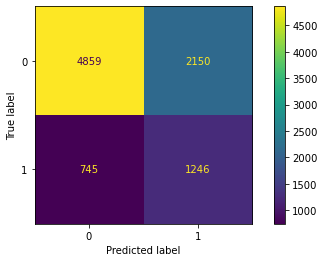

In [118]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test, values_format="d")

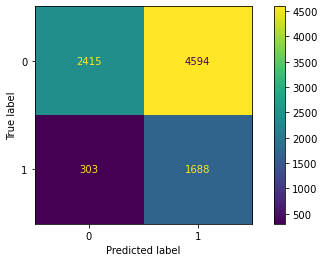

In [119]:
plot_confusion_matrix(gnb, X_test, y_test, values_format="d")

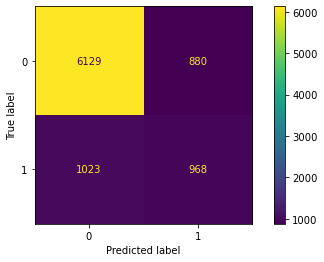

In [120]:
plot_confusion_matrix(RF, X_test, y_test, values_format="d")

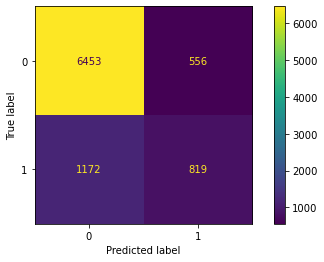

In [121]:
plot_confusion_matrix(XG, X_test, y_test, values_format="d")

In [122]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.678333,0.366902,0.625816,0.462595,0.750540
1,Naive Bayes,0.455889,0.268704,0.847815,0.408074,0.740118
2,Random Forest,0.788556,0.523810,0.486188,0.504298,0.927989
3,XG Boost,0.808000,0.595636,0.411351,0.486631,0.931733


Logistic Regression model has the high recall but the low precision and accuracy higher than naive bayes so, if the business cares recall the most with accuracy, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.